## Multiple Linear Regression
##### Multiple Linear Regression (MLR) is a statistical technique used to predict.
##### The value of one dependent variable (Y) using two or more independent variables (X₁, X₂, X₃, ...).
##### It extends simple linear regression by analyzing how several factors together influence the outcome.

## General Form
##### Y=β0​+β1​X1​+β2​X2​+β3​X3​+...+ε
#### Where:

##### Y = dependent (target) variable

##### X₁, X₂, X₃ = independent (predictor) variables

##### β₀ = intercept

##### β₁…βₙ = coefficients (effect of each independent variable)

##### ε = error term

## Purpose
##### Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance.
##### The dataset consists of 10,000 student records.
##### with each record containing information about various predictors and a performance index.

#### Step 1: Define the Objective


In [56]:
import numpy as np
import os 
import pandas as pd
import kagglehub 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import seaborn as sns

#### Step 2: Collect Data

In [4]:
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\Srujan Kinjawadekar\.cache\kagglehub\datasets\nikhil7280\student-performance-multiple-linear-regression\versions\1


In [7]:
print(os.listdir(path))

['Student_Performance.csv']


In [62]:
df = pd.read_csv(os.path.join(path,'Student_Performance.csv'))
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### Step 3: Data Cleaning & Preparation

In [63]:
df1 = df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [64]:
# Convert the column 'Extracurricular Activities' Yes=1 & No=0
df1['Extracurricular Activities'] = df1['Extracurricular Activities'].map({"Yes":1,"No":0})
df1['Extracurricular Activities'] = df1['Extracurricular Activities'].astype(int)
df1['Performance Index'] = df1['Performance Index'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [65]:
# Drop the unnamed coloumns
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


#### Step 4: Check the Assumptions of Multiple Linear Regression

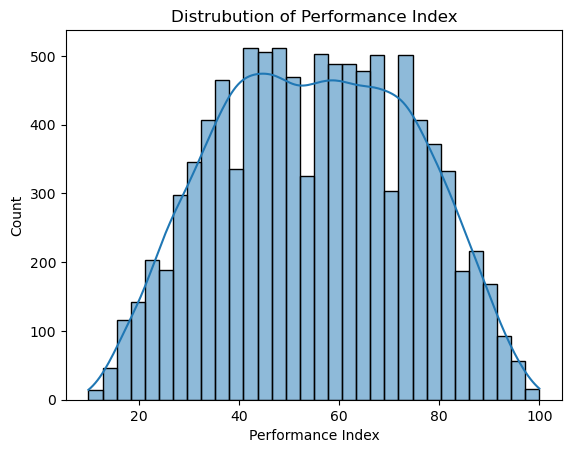

In [66]:
# Plot Distribution of Each Column

plt.Figure(figsize=(10,6))
sns.histplot(df['Performance Index'],kde=True)
plt.title("Distrubution of Performance Index")
plt.show()

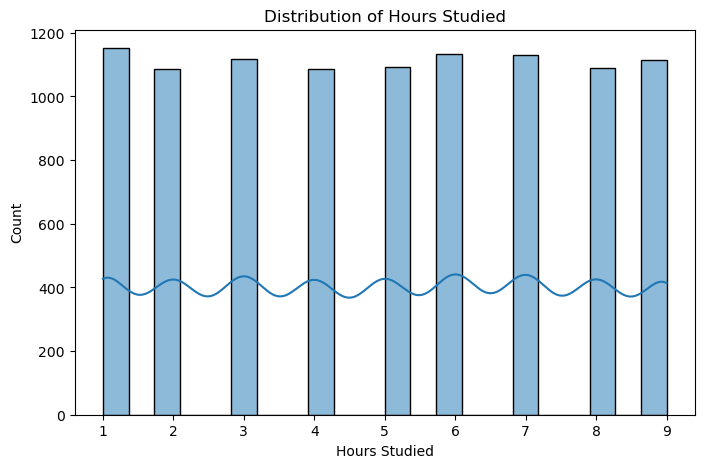

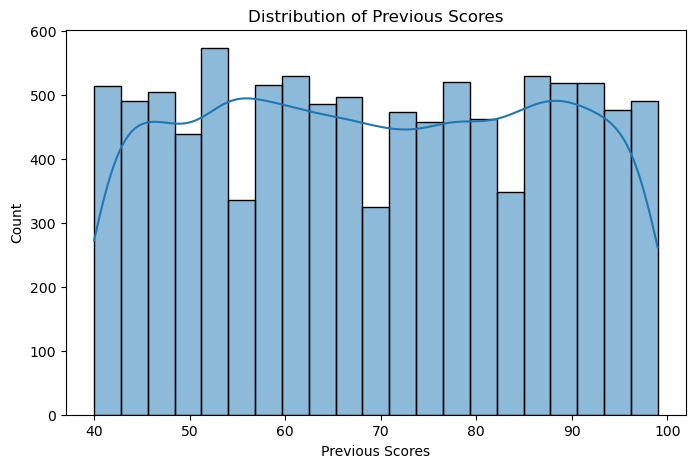

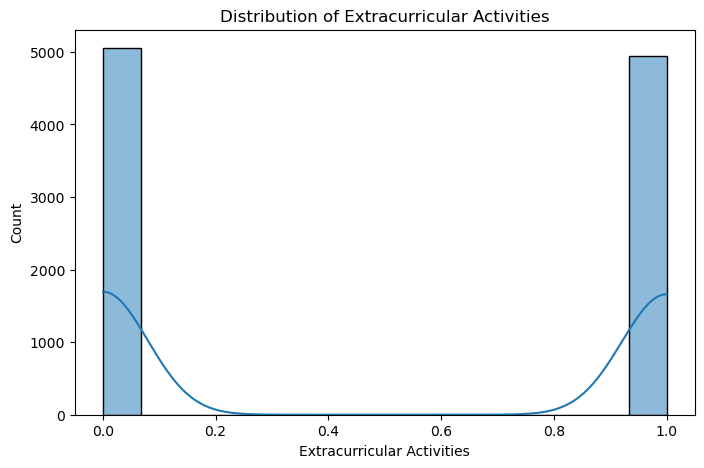

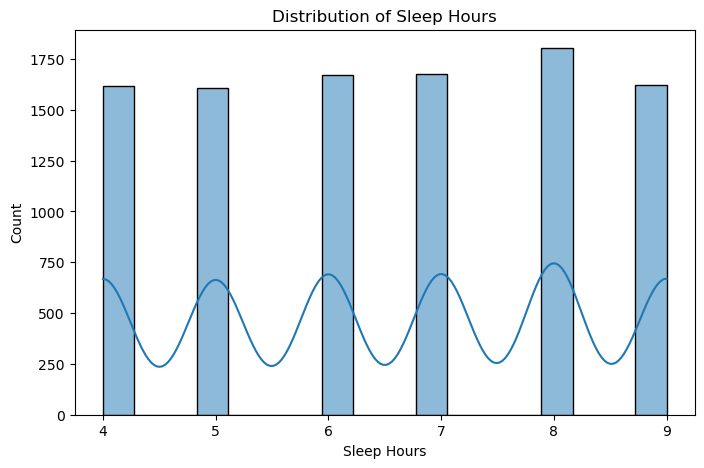

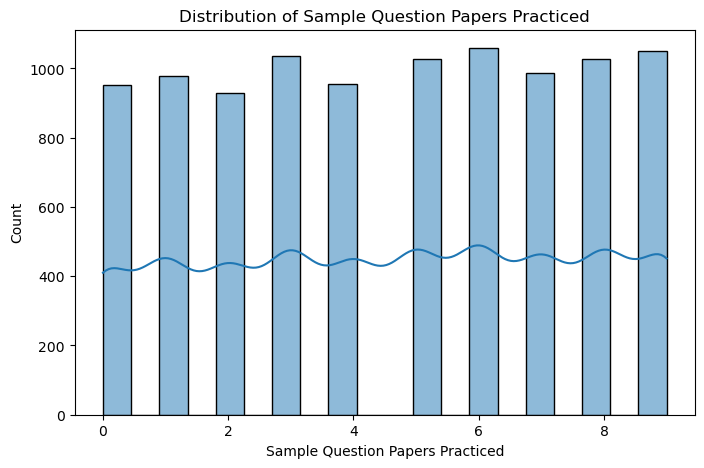

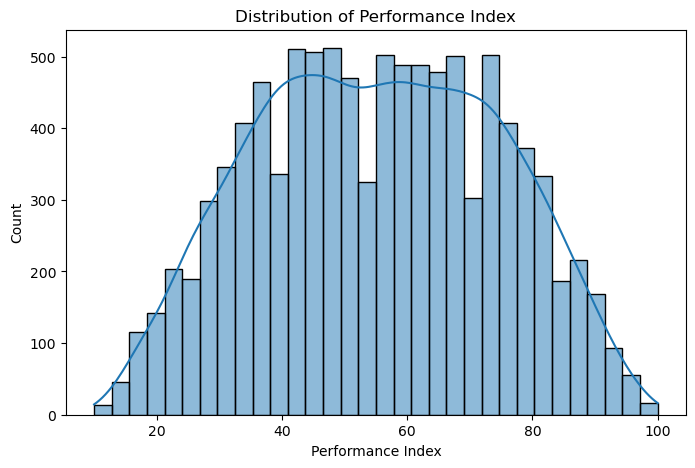

In [67]:
for col in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

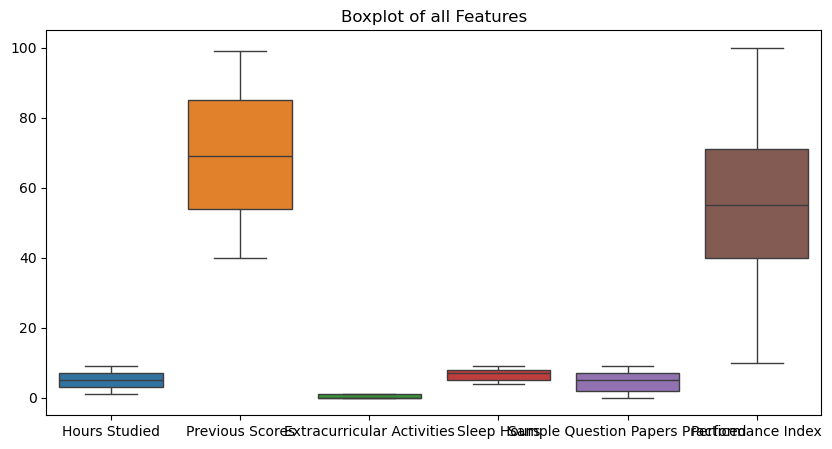

In [68]:
#Boxplots to Detect Outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df1)
plt.title("Boxplot of all Features")
plt.show()

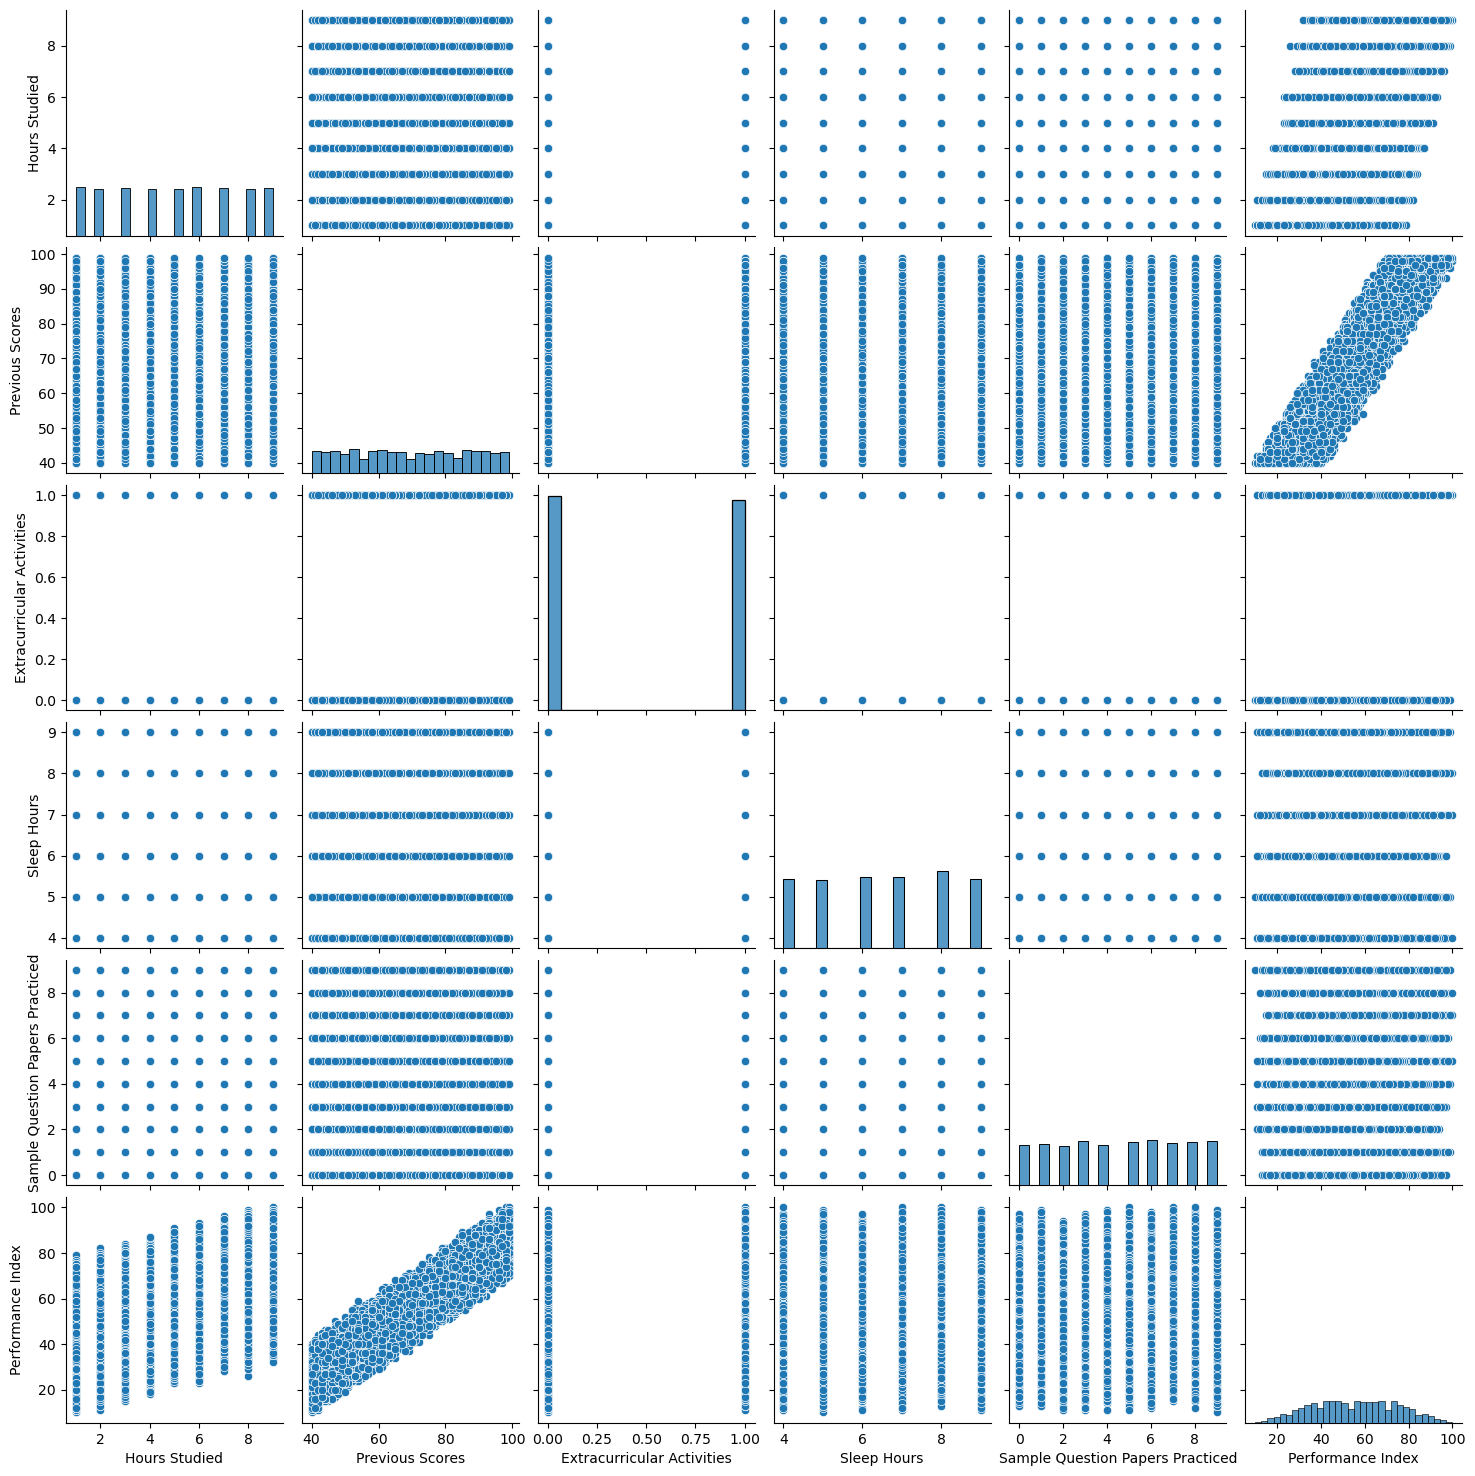

In [69]:
## Pairplot (Scatterplots for All Variable Combinations)
sns.pairplot(df1)
plt.show()


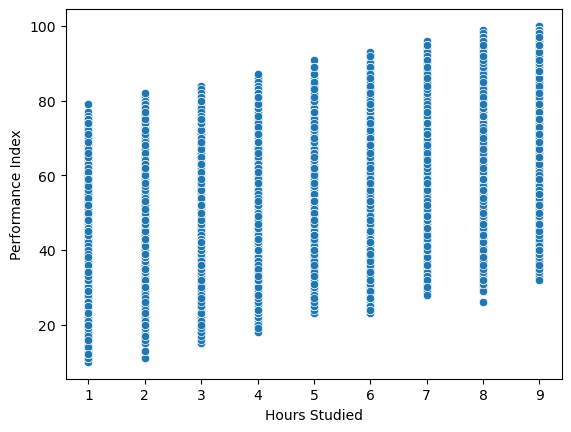

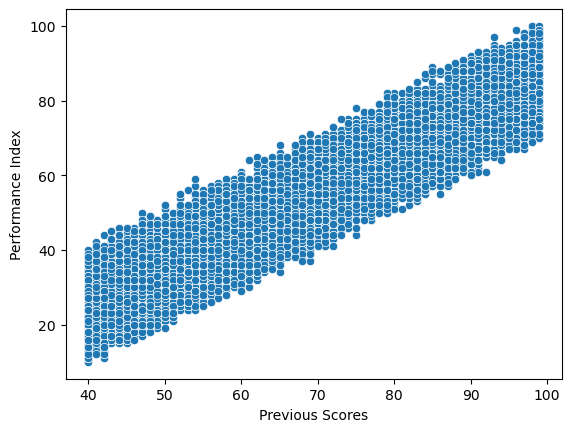

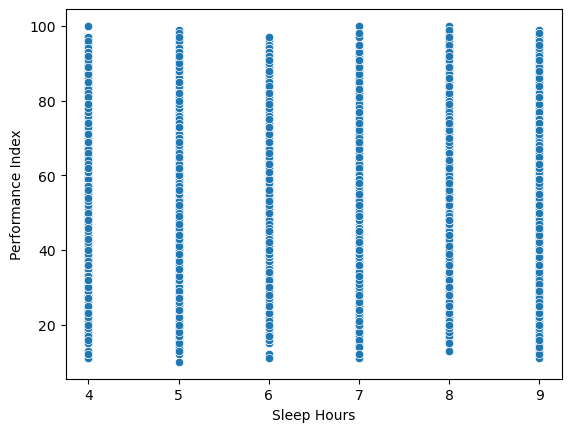

In [70]:
## Scatter Plots Between Independent Variables & Target

sns.scatterplot(x='Hours Studied', y='Performance Index',data=df1)
plt.show()

sns.scatterplot(x='Previous Scores', y='Performance Index',data=df1)
plt.show()

sns.scatterplot(x='Sleep Hours', y='Performance Index',data=df1)
plt.show()


In [76]:

X = df1[['Extracurricular Activities','Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y = df1[['Performance Index']]

#### Step 5: Split the Dataset

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=42)


In [78]:
print("X_train",X_train.shape)
print("X_test", X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


X_train (6000, 6)
X_test (4000, 6)
y_train (6000, 1)
y_test (4000, 1)


#### Step 6: Build the Multiple Linear Regression Model

In [81]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train",X_train.shape)
print("X_test", X_test.shape)

X_train (6000, 6)
X_test (4000, 6)


In [85]:
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

#### Step 7: Interpret Model Output

In [90]:
print("The slope or coefficient of weight of all features ",regression.coef_)
print("Intercept:", regression.intercept_)

y_pred = regression.predict(X_test)

The slope or coefficient of weight of all features  [[ 0.15055746  7.4346526  17.58197793  0.15055746  0.80113321  0.52117003]]
Intercept: [55.4155]


In [91]:
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.054e+05
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        14:42:35   Log-Likelihood:                -12766.
No. Observations:                6000   AIC:                         2.554e+04
Df Residuals:                    5994   BIC:                         2.558e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4155      0.026   2111.962      0.0

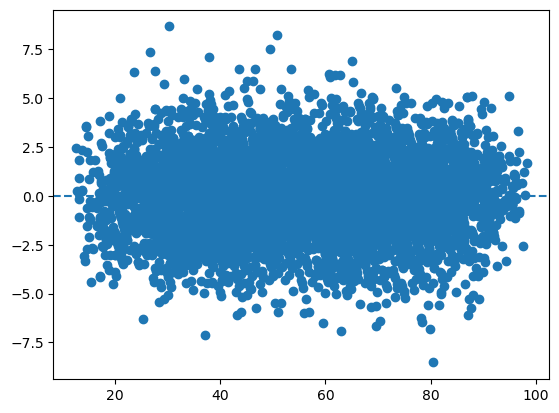

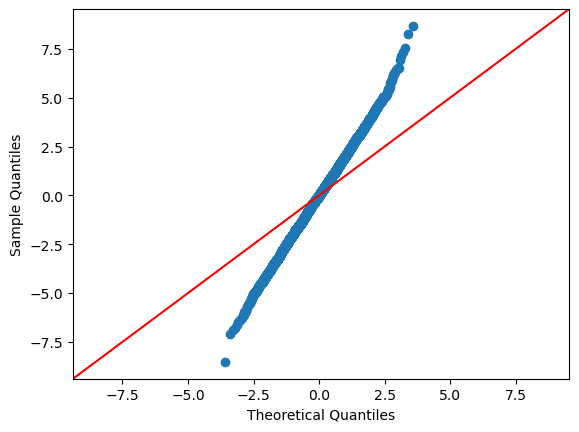

In [92]:
resid = model_sm.resid
fitted = model_sm.fittedvalues

plt.scatter(fitted, resid)
plt.axhline(0, linestyle='--')

sm.qqplot(resid, line='45')
plt.show()

influence = model_sm.get_influence()
cooks = influence.cooks_distance[0]



#### Step 8: Predict Using the Model

In [93]:
y_pred_test = regression.predict(X_test)

#### Step 9: Evaluate the Model
##### R² and Adjusted R²
##### MAE (Mean Absolute Error)
##### MSE (Mean Squared Error)
##### RMSE (Root Mean Squared Error)

In [95]:
r2 = r2_score(y_test, y_pred_test)
adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

rmse = np.sqrt(mse)
print("R2 Score:",r2)
print("Adjusted R2 Score:",adj_r2)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("RMSE:", rmse)

R2 Score: 0.9887189383218594
Adjusted R2 Score: 0.9887019870646421
Mean Absolute Error: 1.6303284094789334
Mean Squared Error: 4.200018212576837
RMSE: 2.0493945966008686
